In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('pd_speech_features.csv', skiprows = 1)
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
df = pd.DataFrame(scaled_df, columns = df.columns)

In [3]:
def get_auc_scores(y_actual, method, method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr, tpr, _ = roc_curve(y_actual, method2);  
    return (auc_score, fpr, tpr)
def plot_roc_curve(name, model, y, X):
    auc, fpr, tpr = get_auc_scores(y, model.predict(X), model.predict_proba(X)[:,1])
    plt.figure(figsize = (12, 6), linewidth = 1)
    plt.plot(fpr, tpr, label = f'{name} score: {str(round(auc, 5))}')
    plt.plot([0, 1], [0, 1], 'k--', label = 'Random: 0.5')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.savefig(f'ROC_Curve_{name}.png')
    plt.show()

In [4]:
y = df['class']
X = df.drop(['class', 'id'], axis = 1)
X = pd.DataFrame(SelectKBest(f_regression, k = 600).fit_transform(X, y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

              precision    recall  f1-score    support
0.0            0.666667  0.775510  0.716981   49.00000
1.0            0.916667  0.864286  0.889706  140.00000
accuracy       0.841270  0.841270  0.841270    0.84127
macro avg      0.791667  0.819898  0.803344  189.00000
weighted avg   0.851852  0.841270  0.844925  189.00000


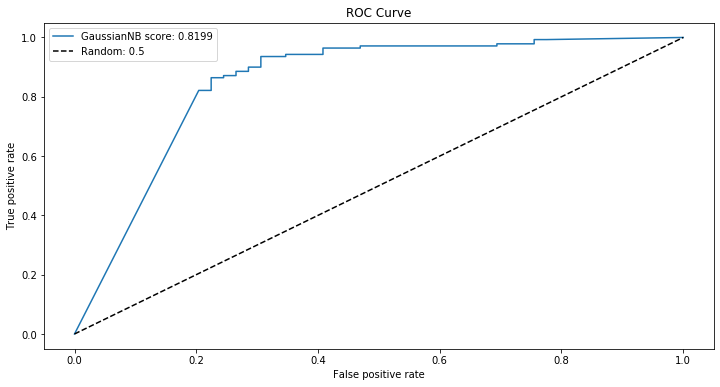

In [5]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(pd.DataFrame(classification_report(y_test, y_pred, output_dict = True)).transpose())
plot_roc_curve('GaussianNB', gnb, y_test, X_test)

              precision    recall  f1-score     support
0.0            0.906977  0.795918  0.847826   49.000000
1.0            0.931507  0.971429  0.951049  140.000000
accuracy       0.925926  0.925926  0.925926    0.925926
macro avg      0.919242  0.883673  0.899438  189.000000
weighted avg   0.925147  0.925926  0.924287  189.000000


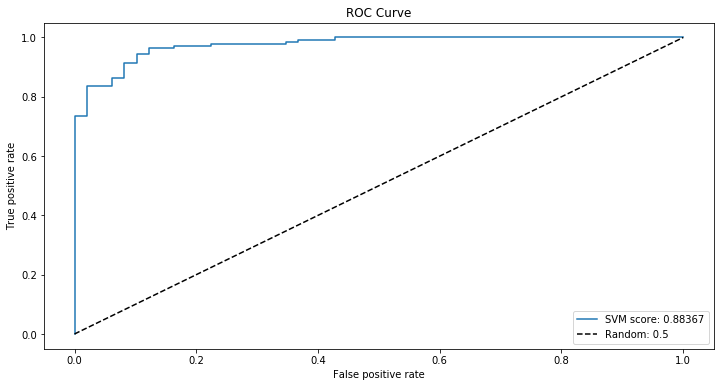

In [6]:
svm = SVC(C = 150, gamma = 0.1, kernel = 'rbf', probability = True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(pd.DataFrame(classification_report(y_test, y_pred, output_dict = True)).transpose())
plot_roc_curve('SVM', svm, y_test, X_test)